In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

In [2]:
df = pd.read_csv("/content/hprice1.csv")
df

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.1,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.5,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.7,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.8,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.1,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630
...,...,...,...,...,...,...,...,...,...,...
83,295.0,318.3,3,6056,1837,1,5.686975,5.762994,8.708805,7.515889
84,236.0,259.4,3,5828,1715,0,5.463832,5.558371,8.670429,7.447168
85,202.5,258.1,3,6341,1574,0,5.310740,5.553347,8.754792,7.361375
86,219.0,232.0,2,6362,1185,0,5.389072,5.446737,8.758098,7.077498


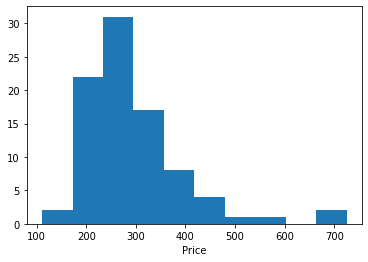

0.6148015074062044


In [3]:
plt.hist(df['price'])
plt.xlabel("Price")
plt.show()
print(skew(df['lprice'],bias=False))

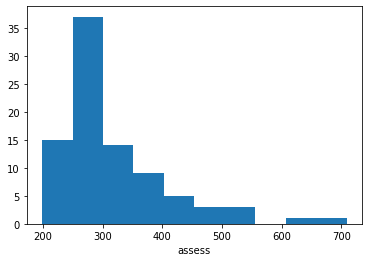

1.807538734507499


In [ ]:
plt.hist(df['assess'])
plt.xlabel("assess")
plt.show()
print(skew(df['assess'],bias=False))

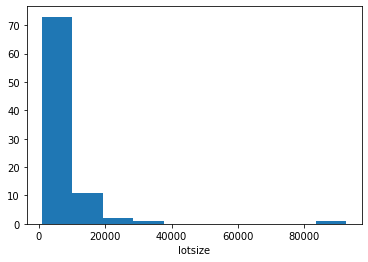

6.7494082021716775


In [ ]:
plt.hist(df['lotsize'])
plt.xlabel("lotsize")
plt.show()
print(skew(df['lotsize'],bias=False))

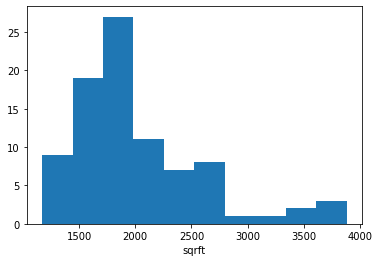

1.4079919526780704


In [ ]:
plt.hist(df['sqrft'])
plt.xlabel("sqrft")
plt.show()
print(skew(df['sqrft'],bias=False))

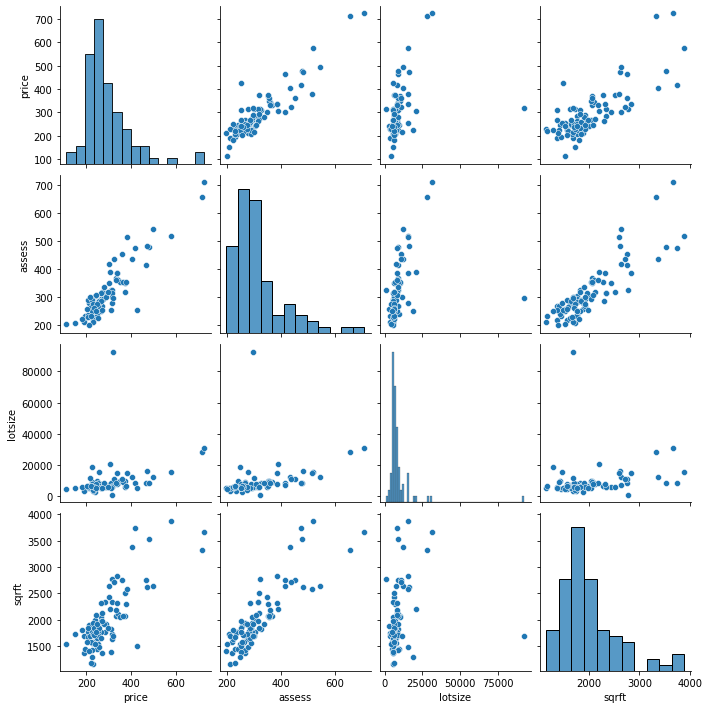

In [ ]:
sns.pairplot(df,vars=['price','assess','lotsize','sqrft'])

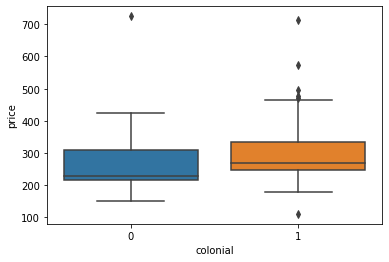

In [ ]:
sns.boxplot(x = df['colonial'],y=df['price'])
plt.show()

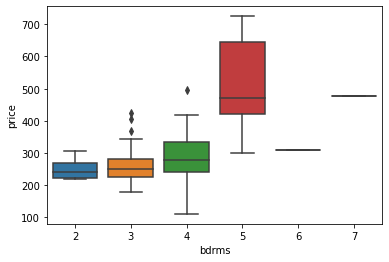

In [ ]:
sns.boxplot(x = df['bdrms'],y=df['price'])
plt.show()

In [20]:
X = df[['lassess','bdrms','colonial']]
y = df.lprice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
X_train

,lassess,bdrms,colonial
40,5.629418,3,1
28,6.169820,7,1
9,5.546349,3,0
66,5.818598,4,1
5,6.027073,5,1
...,...,...,...
20,5.684599,3,1
60,5.673323,3,0
71,5.524257,3,1
14,5.661223,3,1


# **Linear Regression Using statsmodel**

In [22]:
X2 = sm.add_constant(X_train)
model = sm.OLS(y_train,X2)
results = model.fit()
print(results.summary())
X3 = sm.add_constant(X_test)
y_pred = results.predict(X3)
print("R-Squared error for OLS regression {}".format(r2_score(y_test, y_pred)))
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj-R-Squared error for OLS regression {}".format(Adj_r2))

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     85.69
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           5.04e-22
Time:                        17:33:50   Log-Likelihood:                 40.406
No. Observations:                  66   AIC:                            -72.81
Df Residuals:                      62   BIC:                            -64.05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0147      0.393     -0.037      0.9

# **Linear Regression Using sklearn**

In [23]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
print("Linear Regression coefficients {}".format(lm.coef_))
print("Linear Regression Intercept {}".format(lm.intercept_))
y_pred = lm.predict(X_test)
print("Mean Squared error for Linear regression {}".format(mean_squared_error(y_test, y_pred)))
print("R-Squared error for Linear regression {}".format(r2_score(y_test, y_pred)))
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj-R-Squared error for Linear regression {}".format(Adj_r2))

Linear Regression coefficients [0.96635048 0.03194413 0.04338539]
Linear Regression Intercept -0.014734691346230733
Mean Squared error for Linear regression 0.03253790823265198
R-Squared error for Linear regression 0.660186518425111
Adj-R-Squared error for Linear regression 0.6035509381626295


# **Lasso Regression**

In [24]:
lm1 = linear_model.Lasso(alpha=0.001)
lm1.fit(X_train,y_train)
print("Lasso Regression coefficients {}".format(lm1.coef_))
print("Lasso Regression Intercept {}".format(lm1.intercept_))
y_pred = lm1.predict(X_test)
print("Mean Squared error for Lasso regression {}".format(mean_squared_error(y_test, y_pred)))
print("R-Squared error for Lasso regression {}".format(r2_score(y_test, y_pred)))
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj-R-Squared error for Lasso regression {}".format(Adj_r2))

Lasso Regression coefficients [0.94895875 0.0337572  0.03872912]
Lasso Regression Intercept 0.08137337062816474
Mean Squared error for Lasso regression 0.03254542045578274
R-Squared error for Lasso regression 0.6601080636369857
Adj-R-Squared error for Lasso regression 0.6034594075764834


# **Lasso CV**

In [25]:
lm1 = linear_model.LassoCV(alphas=np.linspace(0.00001,0.01,200))
lm1.fit(X_train,y_train)
print("Lasso Regression CV coefficients {}".format(lm1.coef_))
print("Lasso Regression CV Intercept {}".format(lm1.intercept_))
print("Lasso Regression CV Alpha {}".format(lm1.alpha_))
print("Lasso Regression CV Alpha {}".format(lm1.alphas_[lm1.mse_path_.mean(1).argmin()]))
y_pred = lm1.predict(X_test)
print("Mean Squared error for Lasso regression CV {}".format(mean_squared_error(y_test, y_pred)))
print("R-Squared error for Lasso regression CV {}".format(r2_score(y_test, y_pred)))
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj-R-Squared error for Lasso regression CV {}".format(Adj_r2))

Lasso Regression CV coefficients [0.96618557 0.0319609  0.04333908]
Lasso Regression CV Intercept -0.013820351666331554
Lasso Regression CV Alpha 1e-05
Lasso Regression CV Alpha 1e-05
Mean Squared error for Lasso regression CV 0.03253770736991118
R-Squared error for Lasso regression CV 0.6601886161588307
Adj-R-Squared error for Lasso regression CV 0.6035533855186359


# **Ridge Regression**

In [26]:
lm1 = linear_model.Ridge(alpha=0.001)
lm1.fit(X_train,y_train)
print("Ridge Regression coefficients {}".format(lm1.coef_))
print("Ridge Regression Intercept {}".format(lm1.intercept_))
y_pred = lm1.predict(X_test)
print("Mean Squared error for Ridge regression {}".format(mean_squared_error(y_test, y_pred)))
print("R-Squared error for Ridge regression {}".format(r2_score(y_test, y_pred)))
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj-R-Squared error for Ridge regression {}".format(Adj_r2))

Ridge Regression coefficients [0.96606237 0.03198437 0.04337628]
Ridge Regression Intercept -0.013225091243921128
Mean Squared error for Ridge regression 0.03253872249128345
R-Squared error for Ridge regression 0.6601780146190739
Adj-R-Squared error for Ridge regression 0.6035410170555862


# **Ridge Regressio CV**

In [27]:
lm1 = linear_model.RidgeCV(alphas=np.linspace(0.00001,0.01,200))
lm1.fit(X_train,y_train)
print("Ridge Regression CV coefficients {}".format(lm1.coef_))
print("Ridge Regression CV Intercept {}".format(lm1.intercept_))
print("Ridge Regression CV Alpha {}".format(lm1.alpha_))
y_pred = lm1.predict(X_test)
print("Mean Squared error for Ridge regression CV {}".format(mean_squared_error(y_test, y_pred)))
print("R-Squared error for Ridge regression CV {}".format(r2_score(y_test, y_pred)))
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj-R-Squared error for Lasso regression CV {}".format(Adj_r2))

Ridge Regression CV coefficients [0.96481649 0.03215833 0.04333687]
Ridge Regression CV Intercept -0.006697104981198798
Ridge Regression CV Alpha 0.005331306532663316
Mean Squared error for Ridge regression CV 0.03254236206705028
R-Squared error for Ridge regression CV 0.6601400042803656
Adj-R-Squared error for Lasso regression CV 0.6034966716604264


# **Elastic Net Regression**

In [28]:
lm1 = linear_model.ElasticNet(alpha=0.1,l1_ratio=0.5)
lm1.fit(X_train,y_train)
print("Elastic NET Regression coefficients {}".format(lm1.coef_))
print("Elastic NET Regression Intercept {}".format(lm1.intercept_))
y_pred = lm1.predict(X_test)
print("Mean Squared error for Elastic NET Regression {}".format(mean_squared_error(y_test, y_pred)))

Elastic NET Regression coefficients [0.06294453 0.09548064 0.        ]
Elastic NET Regression Intercept 4.950867504176772
Mean Squared error for Elastic NET Regression 0.08628626864061854


# **Elastic Regression CV**

In [29]:
lm1 = linear_model.ElasticNetCV(alphas=np.linspace(0.0001,0.01,500))
lm1.fit(X_train,y_train)
print("Elastic NET Regression coefficients {}".format(lm1.coef_))
print("Elastic NET Regression Intercept {}".format(lm1.intercept_))
print("Elastic NET Regression alpha {}".format(lm1.alpha_))
y_pred = lm1.predict(X_test)
print("Mean Squared error for Elastic NET Regression {}".format(mean_squared_error(y_test, y_pred)))
print("R-Squared error for Elastic NET Regression {}".format(r2_score(y_test, y_pred)))
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj-R-Squared error for Elastic NET Regression {}".format(Adj_r2))

Elastic NET Regression coefficients [0.96454046 0.03216599 0.04312285]
Elastic NET Regression Intercept -0.0050013246747511175
Elastic NET Regression alpha 0.0001
Mean Squared error for Elastic NET Regression 0.03253991048410005
R-Squared error for Elastic NET Regression 0.6601656076760027
Adj-R-Squared error for Elastic NET Regression 0.6035265422886699
